# **House Prices - Advanced Regression Techniques**

**Importing Necessary Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")

**Reading the Dataset**

In [2]:
data = pd.read_csv("train.csv", index_col = "Id" )
test_data = pd.read_csv("test.csv", index_col = "Id")

In [3]:
data.shape

(1460, 80)

In [4]:
pd.set_option('max_columns',80)
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
data.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

## MAE Calculator

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

def cal_mae(X, y):
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, 
                                                      test_size = 0.25, 
                                                      random_state = 0)
    
#     scaler = StandardScaler()
#     scaler.fit_transform(X_train)
#     scaler.transform(X_valid)

    model = XGBRegressor(n_estimators = 1000, learning_rate = 0.05)
    model.fit(X_train, y_train)

    prediction = model.predict(X_valid)
    print(f"Mean Squared Error :{metrics.mean_squared_error(y_valid, prediction)}")
    print(f"Mean Absolute Error :{metrics.mean_absolute_error(y_valid, prediction)}")

# **1. Data Cleaning**

## Data Cleaning Step 1: **Handling Missing Values**

### Handling Missing Values in Rows

In [7]:
# **Checking the Missing Values in the rows**

# If we have above 20% or 30% Values missing in the Rows we will delete them

full = data.shape[1]
print("Percentage of Missing Values in Rows")
(data.isnull().sum(axis = 1).sort_values(ascending = False)/full)*100

Percentage of Missing Values in Rows


Id
40      18.75
1012    18.75
1219    18.75
534     18.75
1180    17.50
        ...  
891      2.50
1388     2.50
1077     2.50
1387     1.25
1329     1.25
Length: 1460, dtype: float64

**Checking if there is any missing Value Present in row**

In [8]:
# We see that we have missing values present in all the rows minimum of 1
data.isnull().any(axis = 1)

Id
1       True
2       True
3       True
4       True
5       True
        ... 
1456    True
1457    True
1458    True
1459    True
1460    True
Length: 1460, dtype: bool

**Checking if we have all values missing in the a Row**

In [9]:
# So we have no row that have all the values missing
data.isnull().all(axis = 0).sum()

0

#### **Checking the Missing Values in the Columns**

In [10]:
# If we have above 30% or 40% Values missing in the Rows we will delete them

full = data.shape[0]
print("Percentage of Missing Values in Columns")
missing_val_percentage = ((data.isnull().sum(axis = 0).sort_values(ascending = False)/full)*100)[:15]
missing_val_percentage

Percentage of Missing Values in Columns


PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageYrBlt      5.547945
GarageCond       5.547945
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtCond         2.534247
BsmtQual         2.534247
dtype: float64

**Dropping the high Percentage missing Values columns**

In [11]:
# So we see that Some of the columns have very high percentage of missing values
# So we will drop them
miss_drop = list(missing_val_percentage[missing_val_percentage > 40].keys())
data.drop(miss_drop, axis = 1, inplace = True)

In [12]:
miss_drop
test_data.drop(miss_drop, axis = 1, inplace = True)

**Checking the dtypes of the Missing Value Cols**

In [13]:
data.dtypes[data.isnull().any()]

LotFrontage     float64
MasVnrType       object
MasVnrArea      float64
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Electrical       object
GarageType       object
GarageYrBlt     float64
GarageFinish     object
GarageQual       object
GarageCond       object
dtype: object

# 2. Imputation

In [14]:
cat = [cname for cname in data.columns if (data[cname].dtype=="object")]
num = [cname for cname in data.columns if (data[cname].dtype in ["int64", "float64"] )]

#### Imputing Num cols

In [15]:
from sklearn.impute import SimpleImputer

num_imputer = SimpleImputer(strategy='median')
data[num] = num_imputer.fit_transform(data[num])

#### Imputing Cat Cols

In [16]:
cat_imputer = SimpleImputer(strategy='most_frequent')
data[cat] = cat_imputer.fit_transform(data[cat])

**Checking the Null values after cleaning**

In [17]:
data.isnull().sum().sum()

0

#### Checking MAE after Applying **Onehot encoding**

In [18]:
X_full = pd.get_dummies(data)

X = X_full.drop("SalePrice", axis = 1)
y = X_full.SalePrice

cal_mae(X, y)

16508.32428296233


#### Checking MAE after Applying **Label Encoding**

In [186]:
from sklearn.preprocessing import LabelEncoder
lencoder = LabelEncoder()

X0 = data.copy()
y0 = X0.pop("SalePrice")

# Label encoding for categoricals
for colname in X0.select_dtypes("object"):
    X0[colname] = lencoder.fit_transform(X0[colname])
    
cal_mae(X0, y0)

Mean Squared Error :964518204.6525689
Mean Absolute Error :16387.13803510274


#### **OrdinalEncoder**

In [187]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

Xoe = data.copy()
yoe = Xoe.pop("SalePrice")

object_cols = [cname for cname in Xoe.columns if Xoe[cname].dtype== "object"]
Xoe[object_cols] = ordinal_encoder.fit_transform(Xoe[object_cols])

cal_mae(Xoe, yoe)


Mean Squared Error :964518204.6525689
Mean Absolute Error :16387.13803510274


In [185]:
# data[object_cols]

### **Binary Encoder**

In [189]:
# from category_encoders import B
# bencoder = BinaryEncoder()

# Xbe = data.copy()
# ybe = Xbe.pop("SalePrice")
    
# object_cols = [cname for cname in Xbe.columns if Xbe[cname].dtype== "object"]
# Xbe[object_cols]


# bencoded = BinaryEncoder.fit_transform(Xbe.MSZoning)

# # Xbe.drop(object_cols, axis  = 1, inplace = True)
# # Xbe = pd.concat([Xbe, bencoded], axis = 1)
# # # cal_mae(Xoe, yoe)

## Data Cleaning  Step 2 **Scaling and Normalization**

## log Transformation

C:\Users\Hp\anaconda3\envs\NCAI\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


mean = 180921.20 and standard deviation = 79415.29


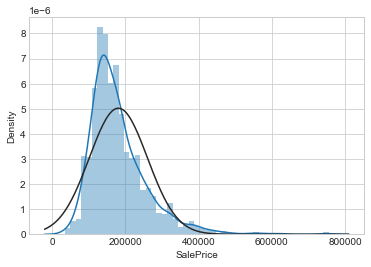

In [20]:
from scipy import stats
from scipy.stats import norm

#Checking for the distribution and skewness after transformation
sns.distplot(data.SalePrice , fit = norm)

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(data.SalePrice)
print('mean = {:.2f} and standard deviation = {:.2f}'.format(mu, sigma))

**Applying log transformation**

C:\Users\Hp\anaconda3\envs\NCAI\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


mean = 12.02 and standard deviation = 0.40


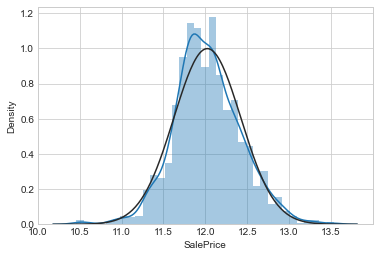

In [21]:
#Applying log transformation
log_data = data.copy()
log_data.SalePrice=np.log(log_data.SalePrice)

#Checking for the distribution and skewness after transformation
sns.distplot(log_data.SalePrice , fit = norm)

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(log_data.SalePrice)
print('mean = {:.2f} and standard deviation = {:.2f}'.format(mu, sigma))


In [22]:
Xlog = log_data.copy()
ylog = Xlog.pop("SalePrice")

Xlog = pd.get_dummies(Xlog)
# # Label encoding for categoricals
# for colname in X1.select_dtypes("object"):
#     X1[colname], _ = X1[colname].factorize()
    
cal_mae(Xlog ,ylog)

0.08179955203265277


## Square root transformation

mean = 416.62 and standard deviation = 85.74


C:\Users\Hp\anaconda3\envs\NCAI\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


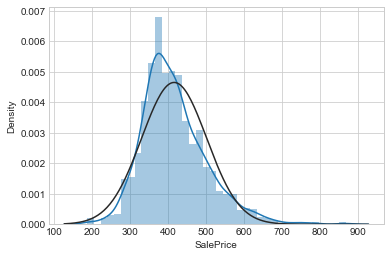

In [23]:
from scipy import stats
from scipy.stats import norm

#Uisng the square root transformation
sq_data = data.copy()
sq_data.SalePrice = np.sqrt(sq_data.SalePrice)

# After the transformation again checking for the distributiona and the skewness

sns.distplot(sq_data.SalePrice , fit = norm)

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(sq_data.SalePrice)
print('mean = {:.2f} and standard deviation = {:.2f}'.format(mu, sigma))


In [24]:
Xsq = sq_data.copy()
ysq = Xsq.pop("SalePrice")

Xsq = pd.get_dummies(Xsq)
# # Label encoding for categoricals
# for colname in X1.select_dtypes("object"):
#     X1[colname], _ = X1[colname].factorize()
    
cal_mae(Xsq ,ysq)

17.90451456291993


## Box Cox transformation

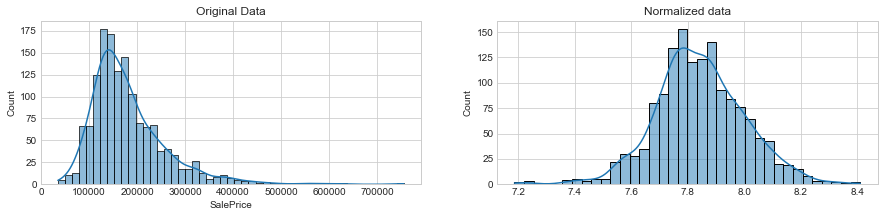

In [25]:
original_data = data.SalePrice


# normalize the exponential data with boxcox
normalized_data = stats.boxcox(original_data)

# plot both together to compare
fig, ax=plt.subplots(1, 2, figsize=(15, 3))
sns.histplot(original_data, ax=ax[0], kde=True, legend=False)
ax[0].set_title("Original Data")
sns.histplot(normalized_data[0], ax=ax[1], kde=True, legend=False)
ax[1].set_title("Normalized data")
plt.show()

# Data Preparation Step 2: **Feature Engineering**

### **1- Decomposing Categorical Features**

In [26]:
# Collecting the names of Categorical Features which have Cordinality > 10
{cname:data[cname].nunique() for cname in cat if data[cname].nunique() >10}

{'Neighborhood': 25, 'Exterior1st': 15, 'Exterior2nd': 16}

In [27]:
# Expending the Neighborhood Column
data.Neighborhood.value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

In [28]:
def decom_neighbor(x):
    if x=="NAmes":
        return "NAmes"
    elif x=="CollgCr":
        return  "CollgCr"
    elif x == "OldTown":
        return  "OldTown"
    elif x == "Edwards":
        return  "Edwards"
    elif x == "Somerst":
        return  "Somerst"
#     elif x == "Gilbert":
#         return  "Gilbert"
#     elif x == "NridgHt":
#         return  "NridgHt"
#     elif x == "Sawyer":
#         return  "Sawyer"
#     elif x == "NWAmes":
#         return  "NWAmes"
    else: return "others"
    

In [29]:
FE_data = data.copy()
FE_data.Neighborhood = FE_data.Neighborhood.apply(decom_neighbor)

In [30]:
FE_data.Neighborhood.value_counts()

others     786
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Name: Neighborhood, dtype: int64

In [31]:
# Expending the Exterior1st Column
data.Exterior1st.value_counts()

VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
BrkComm      2
Stone        2
AsphShn      1
ImStucc      1
CBlock       1
Name: Exterior1st, dtype: int64

In [32]:
def decom_Exterior1st(x):
    if x=="VinylSd":
        return "VinylSd"
    elif x=="HdBoard":
        return  "HdBoard"
    elif x == "MetalSd":
        return  "MetalSd"
    elif x == "Wd Sdng":
        return  "Wd Sdng"
    elif x == "Plywood":
        return  "Plywood"
#     elif x == "CemntBd":
#         return  "CemntBd"
#     elif x == "BrkFace":
#         return  "BrkFace"
#     elif x == "WdShing":
#         return  "WdShing"
#     elif x == "Stucco":
#         return  "Stucco"
    else: return "other_Exterior1st"
    

In [33]:
FE_data.Exterior1st = FE_data.Exterior1st.apply(decom_Exterior1st)

In [34]:
FE_data.Exterior1st.value_counts()

VinylSd              515
HdBoard              222
MetalSd              220
Wd Sdng              206
other_Exterior1st    189
Plywood              108
Name: Exterior1st, dtype: int64

In [35]:
FE_data.Exterior2nd.value_counts()

VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
Other        1
CBlock       1
Name: Exterior2nd, dtype: int64

In [36]:
def decom_Exterior2nd(x):
    if x=="VinylSd":
        return "VinylSd"
    elif x=="HdBoard":
        return  "HdBoard"
    elif x == "MetalSd":
        return  "MetalSd"
    elif x == "Wd Sdng":
        return  "Wd Sdng"
    elif x == "Plywood":
        return  "Plywood"
#     elif x == "CemntBd":
#         return  "CemntBd"
#     elif x == "BrkFace":
#         return  "BrkFace"
#     elif x == "WdShing":
#         return  "WdShing"
#     elif x == "Stucco":
#         return  "Stucco"
    else: return "other_Exterior2nd"
    

In [37]:
FE_data.Exterior2nd = FE_data.Exterior2nd.apply(decom_Exterior2nd)

In [38]:
FE_data.Exterior2nd.value_counts()

VinylSd              504
MetalSd              214
HdBoard              207
Wd Sdng              197
other_Exterior2nd    196
Plywood              142
Name: Exterior2nd, dtype: int64

In [190]:
XFE = FE_data.copy()
yFE = XFE.pop("SalePrice")

object_cols = [cname for cname in XFE.columns if XFE[cname].dtype== "object"]
XFE[object_cols] = ordinal_encoder.fit_transform(XFE[object_cols])

cal_mae(XFE, yFE)



Mean Squared Error :904098917.3392534
Mean Absolute Error :16538.767262414385


# **Dimensionality Reductions**

## Mutual Information

In [40]:
Xmi = data.copy()
ymi = Xmi.pop("SalePrice")

# Label encoding for categoricals
for colname in Xmi.select_dtypes("object"):
    Xmi[colname], _ = Xmi[colname].factorize()
    
cal_mae(Xmi, ymi)

16442.98680436644


In [41]:
discrete_features = Xmi.dtypes == int

<AxesSubplot:>

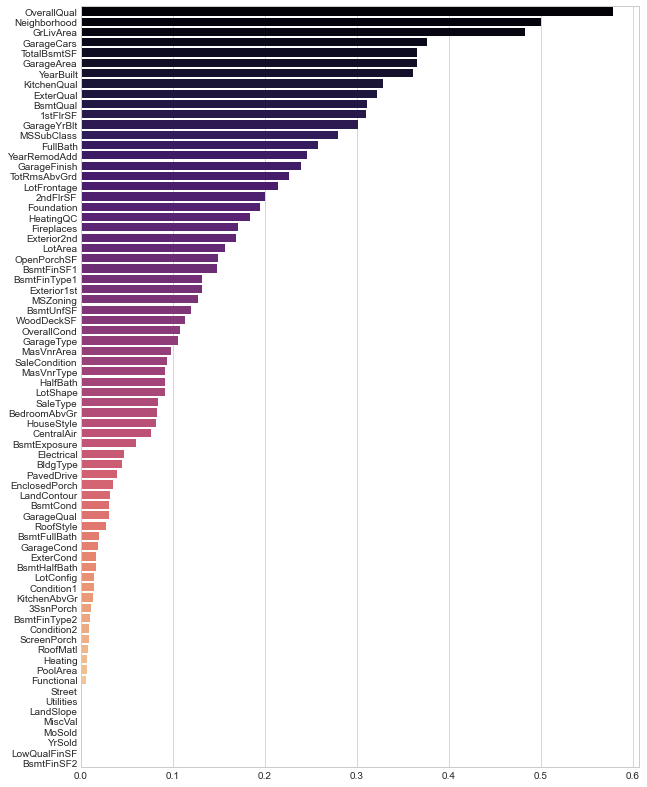

In [42]:
from sklearn.feature_selection import mutual_info_regression

mi_score = mutual_info_regression(Xmi, ymi, discrete_features = discrete_features)
mi_score = pd.Series(data = mi_score, index = Xmi.columns)
mi_score = mi_score.sort_values(ascending = False)

plt.figure(figsize = (10, 14))
sns.barplot(x = mi_score.values,y = mi_score.index, palette = "magma") 

In [43]:
mi_score[20:30]

HeatingQC       0.183994
Fireplaces      0.170777
Exterior2nd     0.168541
LotArea         0.156719
OpenPorchSF     0.149097
BsmtFinSF1      0.147488
BsmtFinType1    0.131941
Exterior1st     0.131585
MSZoning        0.126911
BsmtUnfSF       0.119352
dtype: float64

In [44]:
mi_score2 = mi_score[mi_score> 0.1]

mix = data[mi_score2.index]
miy = data.SalePrice

# Label encoding for categoricals
for colname in mix.select_dtypes("object"):
    mix[colname], _ = mix[colname].factorize()
    
cal_mae(mix, miy)

<ipython-input-44-d674c13e5985>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mix[colname], _ = mix[colname].factorize()


15905.568000856165


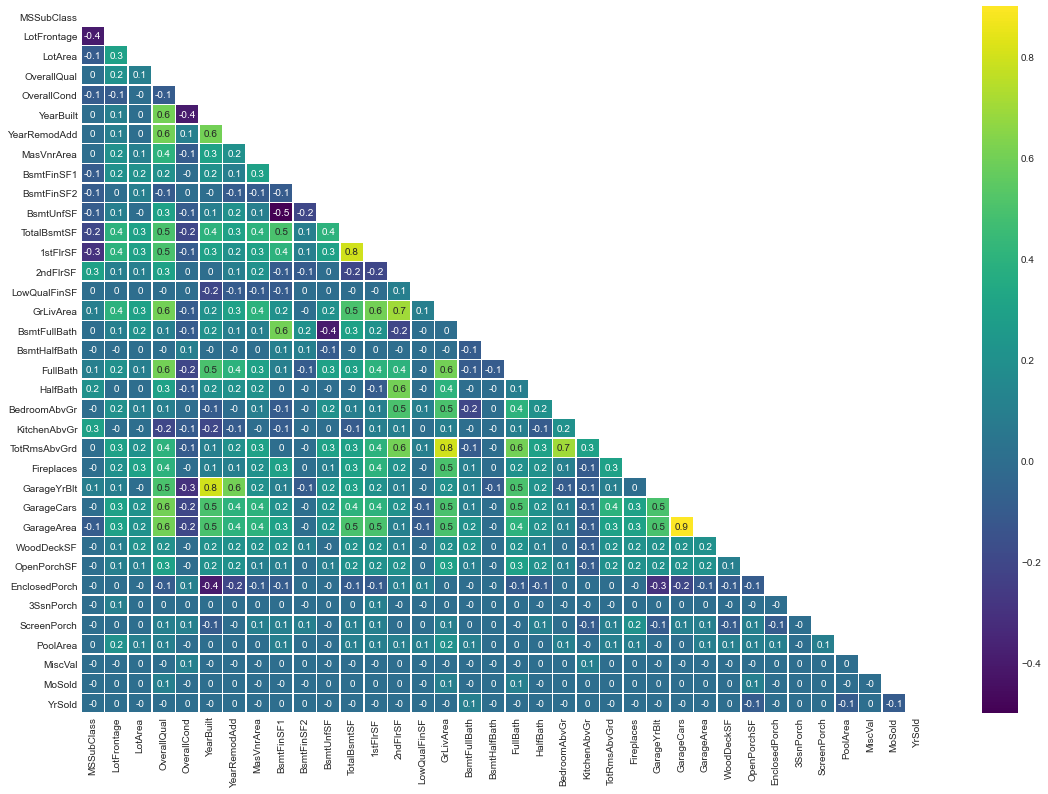

In [48]:
corr = data.drop("SalePrice", axis = 1).corr().round(1)

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize = (19, 13))

sns.heatmap(corr,mask = mask,  annot = True, cmap="viridis", linewidths=.5)
plt.show()

# Correlation

In [49]:
drop = data[["GarageCars", "GarageYrBlt", "TotRmsAbvGrd", "1stFlrSF", "SalePrice"]].columns

corr_data = data.drop(drop, axis = 1)

In [50]:
corrx = corr_data
corry = data.SalePrice

# Label encoding for categoricals
for colname in corrx.select_dtypes("object"):
    corrx[colname], _ = corrx[colname].factorize()
    
cal_mae(corrx, corry)

16948.460530821918


## Variance inflation filtering

In [51]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 

Xvif = data.copy()
yvif = Xvif.pop("SalePrice")

# Label encoding for categoricals
for colname in Xvif.select_dtypes("object"):
    Xvif[colname], _ = Xvif[colname].factorize()

    
vif_data = pd.DataFrame() 
vif_data["feature"] = Xvif.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(Xvif.values, i) 
                          for i in range(len(Xvif.columns))] 
  
vif_data.style.background_gradient(cmap = 'Wistia')

C:\Users\Hp\anaconda3\envs\NCAI\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
C:\Users\Hp\anaconda3\envs\NCAI\lib\site-packages\pandas\io\formats\style.py:1268: RuntimeWarning: invalid value encountered in double_scalars
  norm = colors.Normalize(smin - (rng * low), smax + (rng * high))


,feature,VIF
0,MSSubClass,14.921403
1,MSZoning,1.632143
2,LotFrontage,19.478123
3,LotArea,3.576615
4,Street,1.160901
5,LotShape,2.116380
6,LandContour,1.626728
7,Utilities,1.100502
8,LotConfig,1.589938
9,LandSlope,1.877909


In [52]:
vif_keep = vif_data[vif_data["VIF"] < 5]
vifkeep = vif_keep["feature"].values

vif_final = data[vifkeep]


vix = vif_final.copy()
viy = data.SalePrice

# Label encoding for categoricals
for colname in vix.select_dtypes("object"):
    vix[colname], _ = vix[colname].factorize()
    
cal_mae(vix, viy)

24047.199315068494


## RFECV

In [66]:
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeRegressor
Xcv = data.copy()
ycv = Xcv.pop("SalePrice")

# Label encoding for categoricals
for colname in Xcv.select_dtypes("object"):
    Xcv[colname], _ = Xcv[colname].factorize()

# The "accuracy" scoring is proportional to the number of correct classifications
model = DecisionTreeRegressor() 
rfecv = RFECV(estimator = model, step = 1, cv = 5, scoring='neg_mean_absolute_error')
rfecv = rfecv.fit(Xcv, ycv)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', Xcv.columns[rfecv.support_])
best = Xcv.columns[rfecv.support_]

Optimal number of features : 19
Best features : Index(['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'CentralAir', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'MoSold'],
      dtype='object')


In [67]:
Xv = data[best].copy()
ycv

# Label encoding for categoricals
for colname in Xv.select_dtypes("object"):
    Xv[colname], _ = Xv[colname].factorize()
    
cal_mae(Xv, ycv)


17761.496842893837


# Boruta

In [59]:
bx = data.copy()
by = bx.pop("SalePrice")

# Label encoding for categoricals
for colname in bx.select_dtypes("object"):
    bx[colname], _ = bx[colname].factorize()

In [71]:
from sklearn.ensemble import RandomForestRegressor
from boruta import BorutaPy

# defining the Model
model= RandomForestRegressor(max_depth = 5)

# define Boruta feature selection method
boruta = BorutaPy(estimator = model, n_estimators = 'auto',
                  max_iter = 100, random_state = 0)

# find all relevant features
boruta.fit(np.array(bx), np.array(by))

### print results
best_features = bx.columns[boruta.support_].to_list()
print('features to Keep:', best_features)

features to Keep: ['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtQual', 'BsmtFinSF1', 'TotalBsmtSF', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea']


In [79]:
brtax = data[best_features]
brtay = data.SalePrice

# Label encoding for categoricals
for colname in brtax.select_dtypes("object"):
    brtax[colname], _ = brtax[colname].factorize()

cal_mae(brtax, brtay)

<ipython-input-79-4669a14c03bb>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brtax[colname], _ = brtax[colname].factorize()


Mean Squared Error :1109466227.8027952
Mean Absolute Error :17927.98513484589


# PCA

In [111]:
pcaX = data.copy()
pcay = pcaX.pop("SalePrice")

# Label encoding for categoricals
for colname in pcaX.select_dtypes("object"):
    pcaX[colname], _ = pcaX[colname].factorize()

In [84]:
# from sklearn.model_selection import train_test_split

# X_train, X_valid, Y_train, Y_valid = train_test_split(pcaX, pcay,
#                                                     test_size=0.2,
#                                                     random_state=0 )

In [112]:
#Standardization

from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
X_train_sc = sc.fit_transform(pcaX)
# X_valid_sc = sc.transform(X_valid)

In [122]:
# Choosing the N componesnts for the Traning the PCA above 95% is good
from sklearn.decomposition import PCA

pca=PCA(n_components=None)
x_train_pca = pca.fit_transform(X_train_sc)
# x_valid_pca = pca.transform(X_valid_sc)

#This result the variance explained by the number of components taken into account
pca.explained_variance_ratio_.cumsum()

array([0.12389436, 0.18475699, 0.23528746, 0.27009421, 0.30222597,
       0.3283944 , 0.35317671, 0.37708158, 0.39858942, 0.41948002,
       0.43992361, 0.45927319, 0.4782022 , 0.49618761, 0.51412416,
       0.53101283, 0.54772556, 0.56420743, 0.58026929, 0.5954883 ,
       0.61043862, 0.62496426, 0.63924995, 0.65345056, 0.66687345,
       0.68002384, 0.69304242, 0.70555638, 0.71790992, 0.72975351,
       0.74137714, 0.75254876, 0.76364269, 0.77442038, 0.78500244,
       0.79527165, 0.80511879, 0.81468625, 0.8239444 , 0.83305022,
       0.84202919, 0.85077769, 0.85949344, 0.86792725, 0.87617515,
       0.88397838, 0.8916448 , 0.89909458, 0.90617674, 0.91323597,
       0.91996459, 0.92636306, 0.93247359, 0.93840841, 0.9441243 ,
       0.94952431, 0.95473335, 0.95971645, 0.96452863, 0.96898688,
       0.97326128, 0.97701628, 0.98021753, 0.98339264, 0.98648835,
       0.9894556 , 0.99218637, 0.99448988, 0.99612298, 0.99759347,
       0.998827  , 1.        , 1.        , 1.        ])

In [123]:
pca=PCA(n_components=57)
x_train_pca = pca.fit_transform(X_train_sc)
# x_valid_pca = pca.transform(X_valid_sc)

#This result the variance explained by the number of components taken into account
pca.explained_variance_ratio_.cumsum()

array([0.12389436, 0.18475699, 0.23528746, 0.27009421, 0.30222597,
       0.3283944 , 0.35317671, 0.37708158, 0.39858942, 0.41948002,
       0.43992361, 0.45927319, 0.4782022 , 0.49618761, 0.51412416,
       0.53101283, 0.54772556, 0.56420743, 0.58026928, 0.59548829,
       0.61043861, 0.62496425, 0.63924995, 0.65345056, 0.66687345,
       0.68002384, 0.69304242, 0.70555638, 0.71790991, 0.72975351,
       0.74137713, 0.75254875, 0.76364267, 0.77442036, 0.7850024 ,
       0.79527162, 0.80511875, 0.81468603, 0.82394417, 0.83304999,
       0.84202895, 0.8507774 , 0.85949298, 0.86792677, 0.87617463,
       0.88397782, 0.89164415, 0.89909378, 0.9061759 , 0.91323512,
       0.91996333, 0.92636153, 0.93247193, 0.93840674, 0.94412189,
       0.94952146, 0.95473006])

In [120]:
from xgboost import XGBRegressor

model = XGBRegressor(n_estimators = 1000, learning_rate = 0.01)

from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

score = -1*cross_val_score(model, x_train_pca, pcay, cv = 5, scoring='neg_mean_absolute_error')

In [121]:
score.mean()

18042.50492026969

# t-SNE

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components = 50)
x_train_tsne = pca.fit_transform(X_train_sc)
# x_test_tsne = pca.transform(x_test)

In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

model = XGBRegressor(n_estimators = 1000, learning_rate = 0.01)

score = -1*cross_val_score(model, x_train_tsne, pcay, cv = 5, scoring='neg_mean_absolute_error')
score.mean()

# Linear Discriminant Analysis

In [135]:
# Implementing LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# lets define the Model
lda = LDA(n_components = None)
x_lda = lda.fit_transform(pcaX, pcay)

# Create array of explained variance ratios
lda_var_ratios = lda.explained_variance_ratio_

In [136]:
# Create a function
def select_n_components(var_ratio, goal_var: float) -> int:
    # Set initial variance explained so far
    total_variance = 0.0
    
    # Set initial number of features
    n_components = 0
    
    # For the explained variance of each feature:
    for explained_variance in var_ratio:
        
        # Add the explained variance to the total
        total_variance += explained_variance
        
        # Add one to the number of components
        n_components += 1
        
        # If we reach our goal level of explained variance
        if total_variance >= goal_var:
            # End the loop
            break
            
    # Return the number of components
    return n_components

# lets run the function
select_n_components(lda_var_ratios, 0.95)

59

In [137]:
# lets define the Model
lda = LDA(n_components = 59)
x_train_lda = lda.fit_transform(pcaX, pcay)
# x_test_lda = lda.transform(x_test)

In [138]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

model = XGBRegressor(n_estimators = 1000, learning_rate = 0.01)

score = -1*cross_val_score(model, x_train_lda, pcay, cv = 5, scoring='neg_mean_absolute_error')
score.mean()

17474.378424657534